# Introduction
Contraceptive can be defined as a device or drug that can be used to prevent pregnancy due to sexual intercourse. There are various Contraceptive Method Choice that can be used by anyone to prevent pregnancy. Understanding women’s contraceptive method choices is key to enhancing family planning services provision and programming in the society.
Therefore, this project aims at understanding which is the most preferred contraceptive method choice.


# Dataset Details

This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The dataset contains 9 attributes and 1473 records. The samples are married women who were either not pregnant or do not know if they were at the time of interview.

# Sources
Origin:

This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey

Creator: Tjen-Sien Lim (limt '@' stat.wisc.edu)

Donor: Tjen-Sien Lim (limt '@' stat.wisc.edu)
    
https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

# Description of Columns.

1. Wife's age (numerical)
2. Wife's education (categorical) 1=low, 2, 3, 4=high
3. Husband's education (categorical) 1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary) 0=Non-Islam, 1=Islam
6. Wife's now working? (binary) 0=Yes, 1=No
7. Husband's occupation (categorical) 1, 2, 3, 4
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
9. Media exposure (binary) 0=Good, 1=Not good
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

# Project Deliverables.

A model that predicts  what is the most suitable contraceptive method choice.
To predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import pickle
import sklearn as sk
import warnings

In [2]:
cmc= pd.read_csv("./cmc.csv")

In [3]:
cmc

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [73]:
#this indicates the first ten data records of the total instances.

cmc.head(10)

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
5,19,4,4,0,1,1,3,3,0,1
6,38,2,3,6,1,1,3,2,0,1
7,21,3,3,1,1,0,3,2,0,1
8,27,2,3,3,1,1,3,4,0,1
9,45,1,1,8,1,1,2,2,1,1


In [74]:
#this indicates the last ten data records of the total instances.
cmc.tail(10)

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
1463,30,1,3,2,1,1,3,4,0,3
1464,23,2,2,1,1,1,2,4,0,3
1465,25,2,4,3,1,1,1,3,0,3
1466,42,2,4,6,1,1,2,4,0,3
1467,29,4,4,3,1,1,1,4,0,3
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3
1472,17,3,3,1,1,1,2,4,0,3


# EDA

In [4]:
cmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife's age                    1473 non-null   int64
 1   Wife's education              1473 non-null   int64
 2   Husband's education           1473 non-null   int64
 3   Number of children ever born  1473 non-null   int64
 4   Wife's religion               1473 non-null   int64
 5   Wife's now working?           1473 non-null   int64
 6   Husband's occupation          1473 non-null   int64
 7   Standard-of-living index      1473 non-null   int64
 8   Media exposure                1473 non-null   int64
 9   Contraceptive method used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [5]:
cmc.describe()

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [6]:
cmc.isnull().value_counts().unstack()

,,,,,,,,Contraceptive method used,False
Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,
False,False,False,False,False,False,False,False,False,1473


# Numerical Feature Analysis

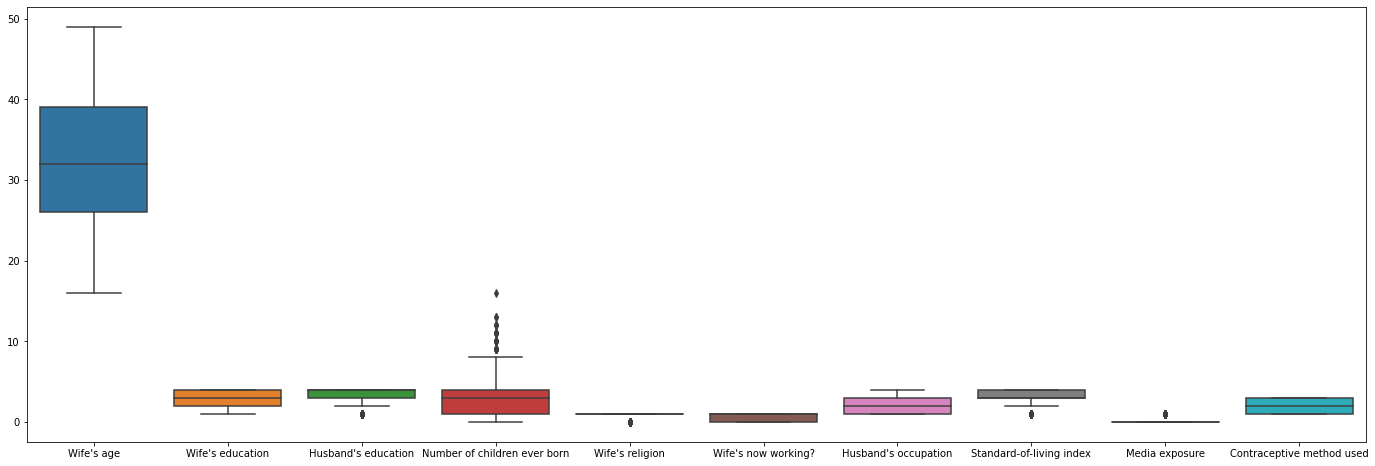

In [9]:
plt.figure(figsize=(24,8))
fig=sns.boxplot(data=cmc)

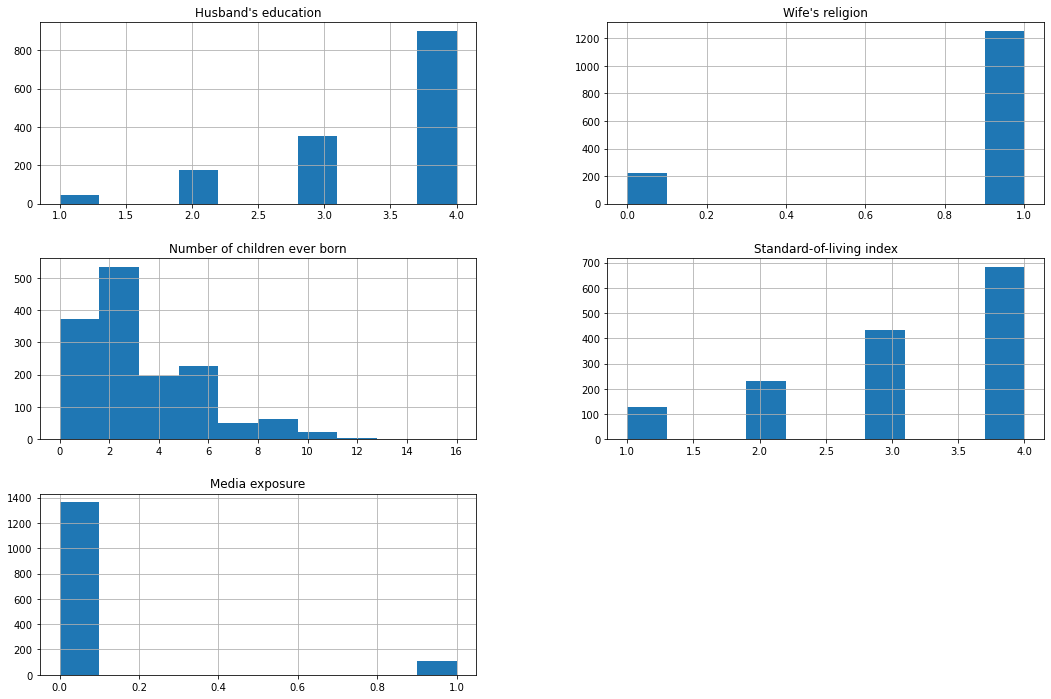

In [84]:
#histogram= cmc.hist()
cols= cmc[["Husband's education","Wife's religion","Number of children ever born","Standard-of-living index","Media exposure"]]
fig = cols.hist(figsize=(18,12))
plt.show()

# Observation on Results.

The data has 1473 intances.
The data has no missing values.
The target variable which is 'Contraceptive Method Used'.
The following columns; Husband's education, Number of children ever born, Wife's religion, Standard-of-living index and Media exposure have outliers and require further analysis.

<Figure size 432x288 with 0 Axes>

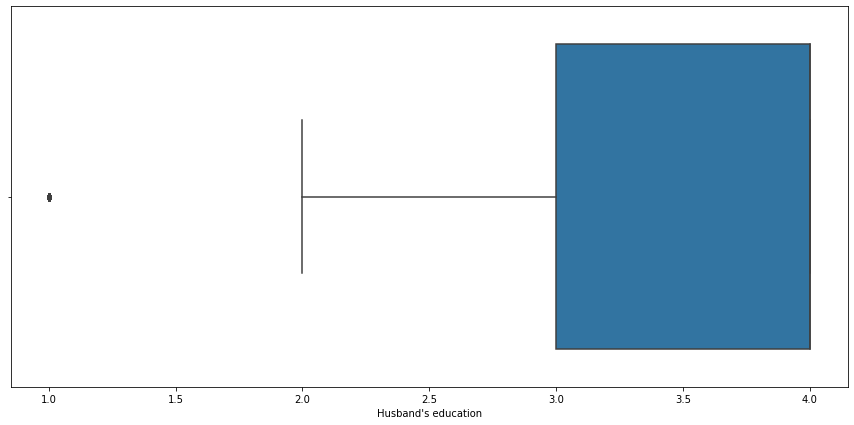

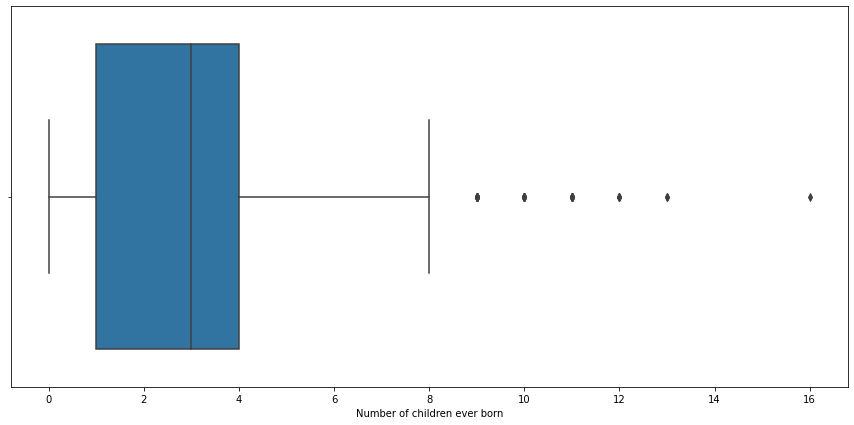

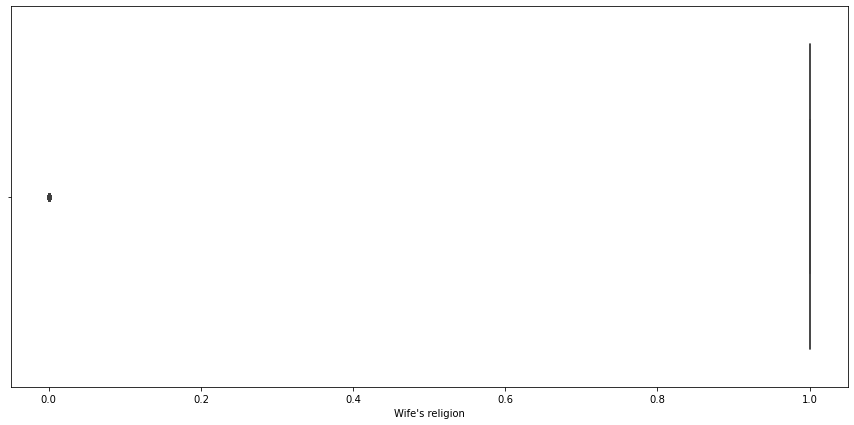

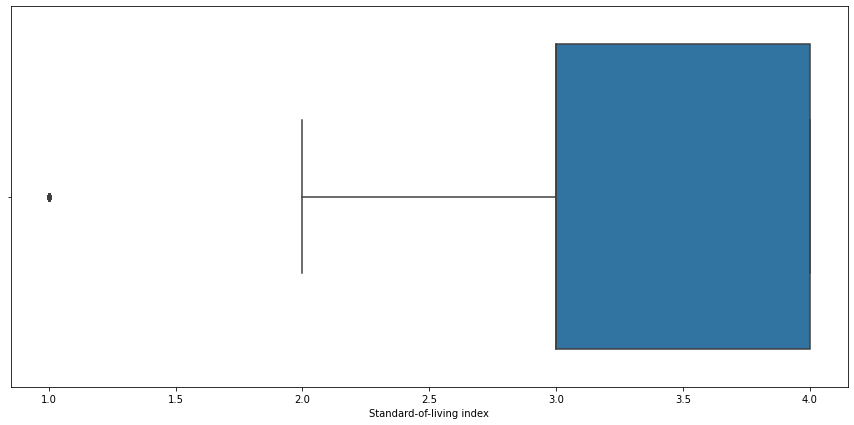

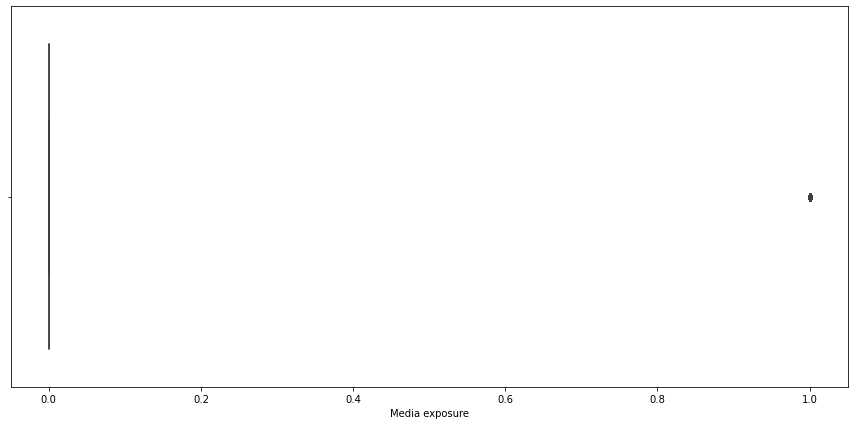

In [11]:
column=pd.DataFrame(cmc[["Husband's education","Number of children ever born","Wife's religion","Standard-of-living index","Media exposure"]])
for i, cols in enumerate (column.columns):
    plt.figure(i)
    plt.figure(figsize=(15,7))
    sns.boxplot(x=cols,data=column)

In [12]:
column=cmc.rename(columns={"Husband's education":"HE","Wife's religion":"WE","Standard-of-living index":"Slindex","Media exposure":"Me","Number of children ever born":"Ncb"},inplace=False)

In [86]:
column

,Wife's age,Wife's education,HE,Ncb,WE,Husband's occupation,Slindex,Me,Contraceptive method used
0,24,2,3,3,1,2,3,0,1
1,45,1,3,10,1,3,4,0,1
2,43,2,3,7,1,3,4,0,1
3,42,3,2,9,1,3,3,0,1
4,36,3,3,8,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,2,4,0,3
1469,33,4,4,3,1,1,4,0,3
1470,39,3,3,8,1,1,4,0,3
1471,33,3,3,4,1,2,2,0,3


# Observations.

The columns; Husband's education, Wife's religion and Standard-of-living index  has outliers on the lower side.

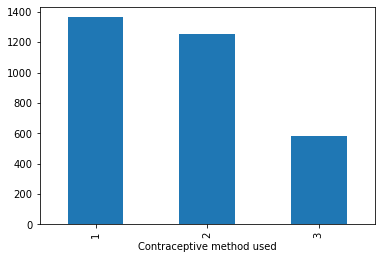

In [14]:
for i, column1 in enumerate (cmc.columns):
    contra= cmc.groupby([column1])["Contraceptive method used"].count()
    contra.plot(kind="bar")

# Observation from the above

The most preferred method as from the above plot indicates that method 1 (No-use) of the Contraceptive method used is most preferred.
Method 3 (Short-term) is the least preferred.

# Preprocessing

zscore=(sample-mean)/std

In [15]:
column["zscore_HE"]=(column.HE-column.HE.mean())/column.HE.std()

In [16]:
column

,Wife's age,Wife's education,HE,Ncb,WE,Wife's now working?,Husband's occupation,Slindex,Me,Contraceptive method used,zscore_HE
0,24,2,3,3,1,1,2,3,0,1,-0.526411
1,45,1,3,10,1,1,3,4,0,1,-0.526411
2,43,2,3,7,1,1,3,4,0,1,-0.526411
3,42,3,2,9,1,1,3,3,0,1,-1.751378
4,36,3,3,8,1,1,3,2,0,1,-0.526411
...,...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3,0.698555
1469,33,4,4,3,1,1,1,4,0,3,0.698555
1470,39,3,3,8,1,0,1,4,0,3,-0.526411
1471,33,3,3,4,1,0,2,2,0,3,-0.526411


In [306]:
column.zscore_HE.min()

-2.9763452833681967

In [307]:
column.zscore_HE.max()

0.698555473045344

In [330]:
column.HE[(column.zscore_HE>=-1.6)].count()

1251

In [331]:
column=column.drop(column.HE[(column.zscore_HE<-1.6)].index)

In [37]:
column

,Wife's age,Wife's education,HE,Ncb,WE,Husband's occupation,Slindex,Me,Contraceptive method used
0,24,2,3,3,1,2,3,0,1
1,45,1,3,10,1,3,4,0,1
2,43,2,3,7,1,3,4,0,1
3,42,3,2,9,1,3,3,0,1
4,36,3,3,8,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,2,4,0,3
1469,33,4,4,3,1,1,4,0,3
1470,39,3,3,8,1,1,4,0,3
1471,33,3,3,4,1,2,2,0,3


# Observations.

If you drop data from one column (Slindex), it will also drop outliers in other columns and therefore, I have use the HE column to preprocess the model.

column.zscore_Slindex.min()

column.zscore_Slindex.max()

column.Slindex[(column.zscore_Slindex>=-2)].plot(kind="box")

column=column.drop(column.Slindex[(column.zscore_Slindex>=-2)].index)

column.Slindex.value_counts()

<AxesSubplot:xlabel='HE'>

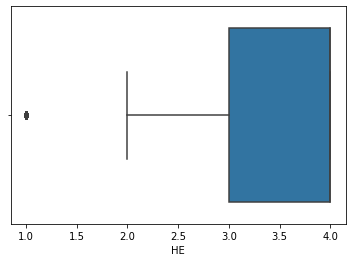

In [38]:
sns.boxplot(column.HE)
#import warnings

In [36]:
column.drop(["zscore_HE"],inplace=True, axis=1)

# Correlation

In [18]:
cor=column.corr()

In [19]:
cor

,Wife's age,Wife's education,HE,Ncb,WE,Wife's now working?,Husband's occupation,Slindex,Me,Contraceptive method used,zscore_HE
Wife's age,1.000000,-0.048011,-0.052879,0.540126,-0.139543,-0.039880,-0.202532,0.184485,0.113306,-0.162953,-0.052879
Wife's education,-0.048011,1.000000,0.618369,-0.193839,-0.232973,-0.062200,-0.395921,0.361450,-0.336080,0.149777,0.618369
HE,-0.052879,0.618369,1.000000,-0.187513,-0.178447,0.001099,-0.337003,0.357490,-0.288691,0.103226,1.000000
Ncb,0.540126,-0.193839,-0.187513,1.000000,0.073917,0.097316,-0.023000,-0.006046,0.133658,0.082772,-0.187513
WE,-0.139543,-0.232973,-0.178447,0.073917,1.000000,0.069837,0.084417,-0.196308,0.060243,-0.025271,-0.178447
Wife's now working?,-0.039880,-0.062200,0.001099,0.097316,0.069837,1.000000,0.014232,-0.076505,0.001828,0.054438,0.001099
Husband's occupation,-0.202532,-0.395921,-0.337003,-0.023000,0.084417,0.014232,1.000000,-0.293831,0.113925,0.018161,-0.337003
Slindex,0.184485,0.361450,0.357490,-0.006046,-0.196308,-0.076505,-0.293831,1.000000,-0.251359,0.091149,0.357490
Me,0.113306,-0.336080,-0.288691,0.133658,0.060243,0.001828,0.113925,-0.251359,1.000000,-0.119206,-0.288691
Contraceptive method used,-0.162953,0.149777,0.103226,0.082772,-0.025271,0.054438,0.018161,0.091149,-0.119206,1.000000,0.103226


<AxesSubplot:>

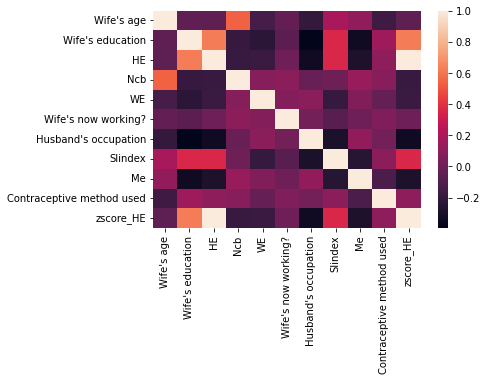

In [20]:
sns.heatmap(cor)

In [21]:
correlation_target=abs(cor["Contraceptive method used"])

In [22]:
correlation_target

Wife's age                   0.162953
Wife's education             0.149777
HE                           0.103226
Ncb                          0.082772
WE                           0.025271
Wife's now working?          0.054438
Husband's occupation         0.018161
Slindex                      0.091149
Me                           0.119206
Contraceptive method used    1.000000
zscore_HE                    0.103226
Name: Contraceptive method used, dtype: float64

# Feature Selection- Univariate feature selection.

In [23]:
warnings.filterwarnings('ignore')
selector = SelectKBest(f_classif, k=8)

feature_sel_data= column.drop('Contraceptive method used',axis=1)
selected_data = selector.fit_transform(feature_sel_data, column['Contraceptive method used'])
selected_data
selected_features = pd.DataFrame(selector.inverse_transform(selected_data), 
                                 index=column.index, 
                                 columns=feature_sel_data.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]
selected_features[selected_columns].head()

,Wife's age,Wife's education,HE,Ncb,Husband's occupation,Slindex,Me,zscore_HE
0,24.0,2.0,3.0,3.0,2.0,3.0,0.0,-0.526411
1,45.0,1.0,3.0,10.0,3.0,4.0,0.0,-0.526411
2,43.0,2.0,3.0,7.0,3.0,4.0,0.0,-0.526411
3,42.0,3.0,2.0,9.0,3.0,3.0,0.0,-1.751378
4,36.0,3.0,3.0,8.0,3.0,2.0,0.0,-0.526411


Observation: Wife's now working? column has been removed.

In [24]:
column

,Wife's age,Wife's education,HE,Ncb,WE,Wife's now working?,Husband's occupation,Slindex,Me,Contraceptive method used,zscore_HE
0,24,2,3,3,1,1,2,3,0,1,-0.526411
1,45,1,3,10,1,1,3,4,0,1,-0.526411
2,43,2,3,7,1,1,3,4,0,1,-0.526411
3,42,3,2,9,1,1,3,3,0,1,-1.751378
4,36,3,3,8,1,1,3,2,0,1,-0.526411
...,...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3,0.698555
1469,33,4,4,3,1,1,1,4,0,3,0.698555
1470,39,3,3,8,1,0,1,4,0,3,-0.526411
1471,33,3,3,4,1,0,2,2,0,3,-0.526411


In [25]:
column=column.drop(["Wife's now working?"],axis=1)

# Test Train Split

In [26]:
x=column.drop(columns="Contraceptive method used")
y=column["Contraceptive method used"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Model Creation

In [27]:
log_reg = LogisticRegression(random_state = 42)
svm_clf = SVC(random_state = 42)
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state = 42)
dtree_clf = DecisionTreeClassifier(random_state = 42)
Lda = LDA()

models = {'LogisticRegression': log_reg, 'SVC': svm_clf, 'KNeighborsClassifier': knn_clf, 'LDA':Lda,
          'RandomForestClassifier': rf_clf, 'DecisionTreeClassifier':dtree_clf}

# Model Selection

In [39]:
def model_selection(models):
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_predict_trian = model.predict(x_train)
        y_predict_test = model.predict(x_test)
        print(f'{model_name} Training Accuracy:', accuracy_score(y_train, np.round(y_predict_trian)))
        print(f'{model_name} Testing Accuracy:', accuracy_score(y_test, np.round(y_predict_test)))
        print('\n')

In [40]:
model_selection(models)

LogisticRegression Training Accuracy: 0.5195246179966044
LogisticRegression Testing Accuracy: 0.5322033898305085


SVC Training Accuracy: 0.5220713073005093
SVC Testing Accuracy: 0.44745762711864406


KNeighborsClassifier Training Accuracy: 0.6943972835314092
KNeighborsClassifier Testing Accuracy: 0.5423728813559322


LDA Training Accuracy: 0.5229202037351444
LDA Testing Accuracy: 0.5322033898305085


RandomForestClassifier Training Accuracy: 0.9490662139219015
RandomForestClassifier Testing Accuracy: 0.5220338983050847


DecisionTreeClassifier Training Accuracy: 0.9490662139219015
DecisionTreeClassifier Testing Accuracy: 0.4745762711864407




# Observations

The above models are executed to identifying the most correct model that can be used to predict the most preferred Contraceptive method used.

# Hyper-Parameter tuning SVC classifier

In [45]:
param_grid = {'kernel': ('linear', 'rbf','poly') , 
              'C':[5,10],
              'gamma': [1], 
              'degree' : [1]}

grid = GridSearchCV(svm_clf, param_grid , refit=True)
grid.fit(x_train,y_train)
grid.best_estimator_

SVC(C=10, degree=1, gamma=1, kernel='linear', random_state=42)

# Creating a variable called SVC

In [51]:
SVC_tuned=SVC(C=10, degree=1, gamma=1, kernel='linear', random_state=42)
SVC_tuned.fit(x_train,y_train)

SVC(C=10, degree=1, gamma=1, kernel='linear', random_state=42)

# Evaluation

Text(0.5, 15.0, 'Predicted Label')

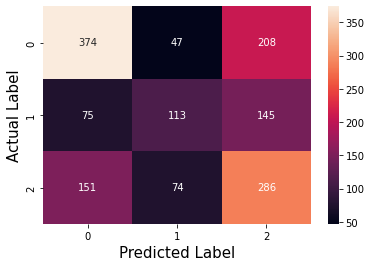

In [61]:
y_predict=SVC_tuned.predict(x)

#Confusion Matrix
confusion_matrix=sk.metrics.confusion_matrix(y, y_predict)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, fmt="d")
plt.ylabel('Actual Label', fontsize = 15)
plt.xlabel('Predicted Label', fontsize = 15)

# Observations.

The actual data on column and predicted on the row.

Women using contraceptives are 374 while method 1 was 47.

Those not using a short term method 2 is 208.

In [67]:
# ac
scores=pd.DataFrame(classification_report(y,y_predict,output_dict=True))
scores=scores.rename(columns = {'1': 'No-use','2':'Long-term','3':'Short-term',
                        }) 
scores.transpose()

,precision,recall,f1-score,support
No-use,0.623333,0.594595,0.608625,629.000000
Long-term,0.482906,0.339339,0.398589,333.000000
Short-term,0.447574,0.559687,0.497391,511.000000
accuracy,0.524779,0.524779,0.524779,0.524779
macro avg,0.517938,0.497874,0.501535,1473.000000
weighted avg,0.530614,0.524779,0.522554,1473.000000


Precision the ratio of true positives divided by the false positives plus the true positives which tranlates to 62%.

Recall indicates how correctly the model finds the true positives with 59%.

Support is the number of instances found on No-Use 629 that has been found correctly by the model.

In [64]:
pickle.dump(SVC_tuned, open("SVC Model", "wb"))

# Conclusion

The SVC Model is the best for this project.
More data is required in order to improve the prediction.
Based on a woman's demographic and socio-economic characteristics, the most preferred contraceptive choice method was no-use with a total of 374 instances.